### Load data from the allen and plot reference structures

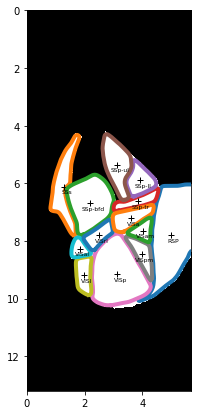

In [15]:
from wfield.allen import *

refregions,bmap,bvol = get_reference_regions_from_allen(
    gauss_filt = 3,
    contour_thresh = 0.65)

%matplotlib inline 
import pylab as plt
plt.figure(figsize = [10,7])
plot_overview_reference_regions(refregions,bmap)

save_refregions(refregions);

### Manual registration procedure:

* Load refregions from local 
* Set the reference image and window size manually
* Load functional images and manually register to the structure maps.




In [ ]:
from wfield.allen import load_refregions
from wfield import *
from tifffile import imread
# Load ref regions
refregions = load_refregions()
# Load data
oriim = imread('/mnt/nerfhf01/boninwip/data/1photon/raw/190124_JC092_1P_JC/run02_retino_circling_noise_circle_whiskers/20190124_run001_00000000.tif').mean(axis = 0)
stim0 = imread('/mnt/nerfhf01/boninwip/data/analysis/190124_JC092_1P_JC/run02_retino_circling_noise_circle_whiskers/stimaverages_cam3/stim0.tif')

%matplotlib notebook
# Annotate the resolution from the window size
resmanual = manual_sample_window_scale(oriim)

In [ ]:
# Now the manual annotations
print('Manual annotation of the window:')
print('\n'.join(['\t {0}: {1}'.format(k,resmanual[k]) 
                 for k in ['circlepar','resolution','points']]))

refpar = {'translation': np.array([0,  0]), 'rotation': 0, 'scale': 1}
fig = plt.figure()
extent = imshow_window(oriim,resmanual,plot = False)
nb_play_movie(stim0[:,:,::-1],clim = [0,3],extent = extent)
manual_overlay_allen_areas(refregions,refpar)

In [ ]:
# Plot on another stimulus reference
res = adjust_allen_areas(refregions,**refpar)
plt.figure()
stim1 = imread('/mnt/nerfhf01/boninwip/data/analysis/190124_JC092_1P_JC/run02_retino_circling_noise_circle_whiskers/stimaverages_cam3/stim1.tif')

nb_play_movie(stim1[:,::,::-1],extent = extent,clim = [0,2])
plot_allen_areas(res);

/opt/conda/envs/tacnav/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


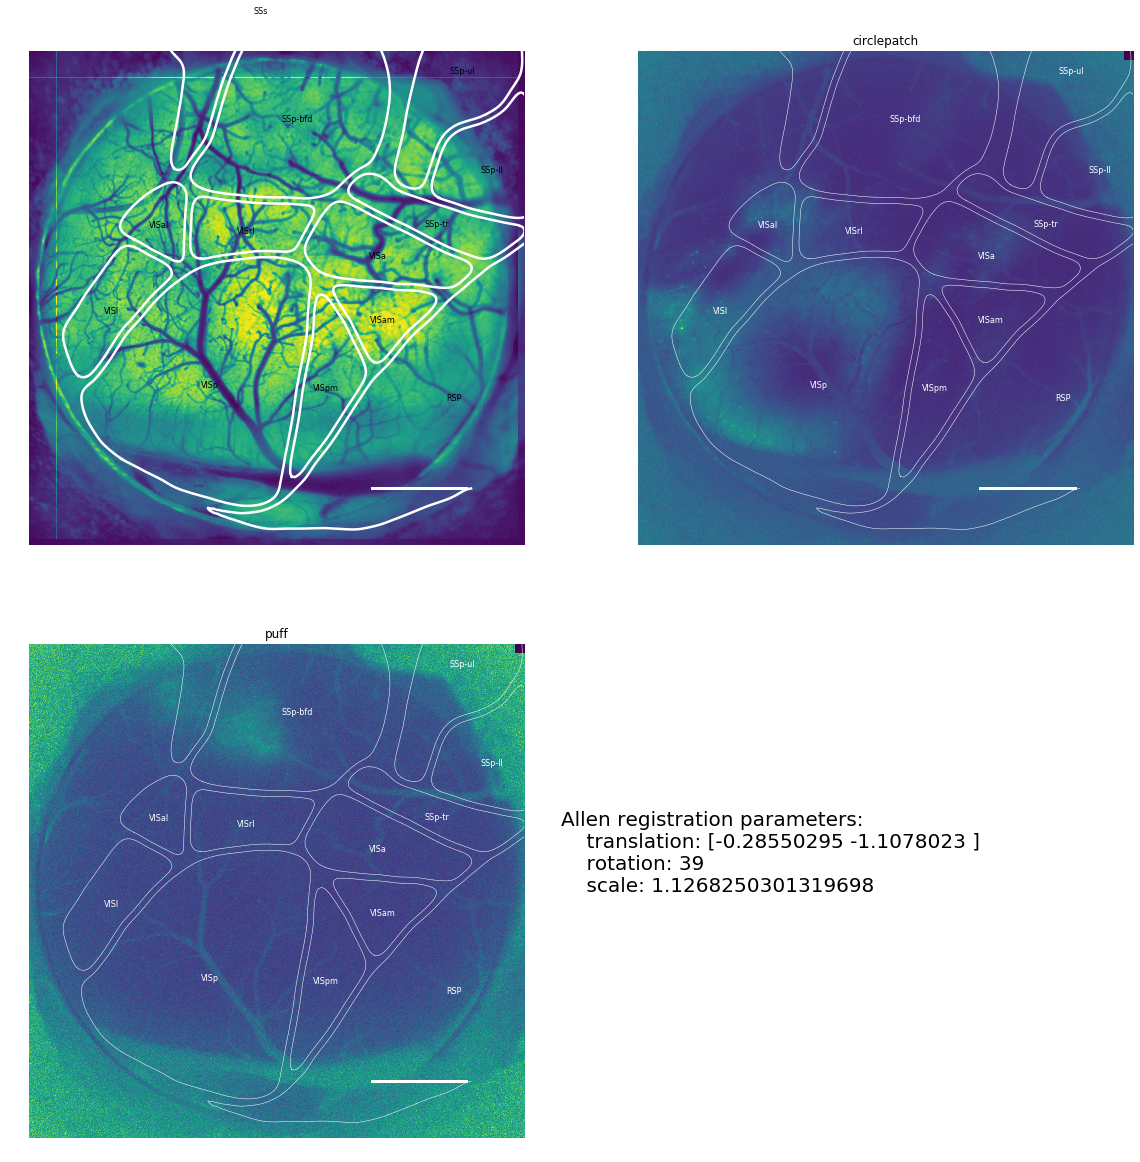

In [16]:
# Plot the map and overlay:
%matplotlib inline 
fig = plt.figure(figsize = [20,20])
res = adjust_allen_areas(refregions,**refpar)
fig.add_subplot(2,2,1)
from skimage import img_as_float,exposure
ii = img_as_float(oriim[::,::-1].astype(np.uint16))
ii = exposure.equalize_adapthist(ii, clip_limit=0.02)
extent = imshow_window(ii,resmanual)
plot_allen_areas(res,color = 'w',lw = 2.5,clip_on = True)
plt.axis(extent)
plt.plot([1,2],[2,2],'w',lw=3)
plt.axis('off')

fig.add_subplot(2,2,2)
idx = np.where(stim0[:,0,0]>1)[0]
imshow_window(stim0[idx,::,::-1].std(axis = 0),resmanual)
pp,tt = plot_allen_areas(res,color = 'w',lw = 0.5,clip_on = True)
for t,p in zip(tt,pp):
    t.set_color('w')
    p.set_color('w')
plt.axis(extent)
plt.plot([1,2],[2,2],'w',lw=3)
plt.axis('off')
plt.title('circlepatch')
fig.add_subplot(2,2,3)
idx = np.where(stim1[:,0,0]>1)[0]
imshow_window(stim1[idx,::,::-1].std(axis = 0),resmanual)
pp,tt = plot_allen_areas(res,color = 'k',lw = 0.5,clip_on = True)
for t,p in zip(tt,pp):
    t.set_color('w')
    p.set_color('w')
plt.axis(extent)
plt.plot([1,2],[2,2],'w',lw=3)
plt.axis('off')
plt.title('puff');
plt.text(3,0,'''Allen registration parameters:
    translation: {translation}
    rotation: {rotation}
    scale: {scale}'''.format(**refpar),fontsize = 20);